
## Homework 4 - Denoising a colour image




In [ ]:
#%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

## Load the dataset to use is CIFAR10

In [ ]:
# Load CIFAR10 Data
(x_train, _), (x_test, _) = cifar10.load_data()

# Data Preprocessing
x_train = x_train / 255
x_test = x_test / 255
print("reading done")
print(x_train.shape)


reading done
(50000, 32, 32, 3)


In [ ]:
noise_factor = 0.05
x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)



## Have a look to the images

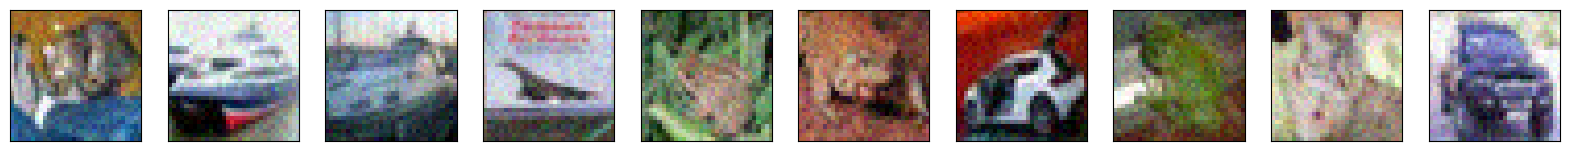

In [ ]:
# Display some noisy images
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## KERAS: sintax Model API

In [ ]:
# Define Autoencoder Model (Adapted for Color Images)
# Improved Autoencoder Model
input_img = Input(shape=(32, 32, 3))

# Deeper Encoder/Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)  # More filters
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')  # Mean Squared Error (MSE)
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928 

In [ ]:
# Training with More Epochs and Early Stopping
autoencoder.fit(x_train_noisy, x_train,
                epochs=120,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[early_stopping])



Epoch 1/120
391/391 [==============================] - 10s 15ms/step - loss: 0.0113 - val_loss: 0.0058
Epoch 2/120
391/391 [==============================] - 4s 11ms/step - loss: 0.0052 - val_loss: 0.0046
Epoch 3/120
391/391 [==============================] - 4s 11ms/step - loss: 0.0044 - val_loss: 0.0041
Epoch 4/120
391/391 [==============================] - 4s 11ms/step - loss: 0.0040 - val_loss: 0.0037
Epoch 5/120
391/391 [==============================] - 4s 10ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 6/120
391/391 [==============================] - 4s 10ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 7/120
391/391 [==============================] - 6s 14ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 8/120
391/391 [==============================] - 4s 10ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 9/120
391/391 [==============================] - 4s 10ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 10/120
391/391 [==============================] - 4s 11ms/step - loss: 0.00

313/313 [==============================] - 1s 2ms/step


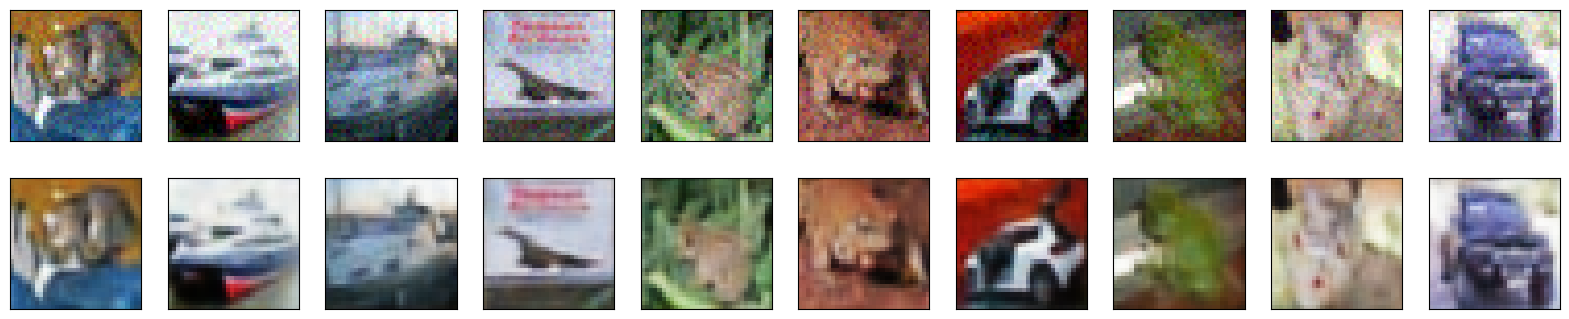

In [ ]:
# Predict and Display Results
# Display Reconstructions
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()